<a href="https://colab.research.google.com/github/sheikhi-a/Big-data-with-Python/blob/main/Some__new_age_graghs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Some new age statistical plots using  python**

> Add blockquote




By Ayyub Sheikhi
**bold text**
Department of statistics,

Shahid Bahonar University of Kerman, Iran

# 1 Violin Plot

In [ ]:
file1 = 'https://raw.githubusercontent.com/prince381/car_mpg_predict/master/cars1.csv'
mtcars = pd.read_csv(file1)   # read in the first data file

plt.violinplot(mtcars.mpg)
sns.violinplot(x='cylinders', y='mpg',data=mtcars)

sns.violinplot(x='cylinders', y='horsepower', data=mtcars, inner=None, color='lightgrey')
sns.stripplot(x='cylinders', y='horsepower', data=mtcars, size=4.5, jitter=True);plt.ylabel('$')


#mearge the above graphs



plt.show()

# 2- World cloud plot

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text="big data is a field of data science that explore the huge data behaiviour "

wcl = WordCloud(width = 300, height = 300).generate(text)

# Remove the axis and display the data as image
plt.axis("off")
plt.imshow(wcl, interpolation = "bilinear")

# plt.show()

**You can extract main information  from a book  or an article**





In [ ]:
text="Mamta received her BTech (with honors) in com- puter engineering in 2011 from the University Institute of Engineering and Technology, Kurukshetra University, India, and her MTech in computer engi- neering (with distinction) in 2014 from the National Institute of Technology, Kurukshetra, India. She received her PhD in computer engineering from the National Institute of Technology, Kurukshetra, India, in 2020. At present, Dr. Mamta is an assistant pro- fessor in the Department of Computer Science"
wcl = WordCloud(width = 300, height = 300).generate(text)
plt.axis("off")
plt.imshow(wcl, interpolation = "bilinear")

In [ ]:
!wget https://raw.githubusercontent.com/CConstance/tweets_sentiment/master/test.csv

import pandas as pd
import seaborn as sns
df = pd.read_csv("test.csv")
df.columns
df.shape
df.tail(20)

text = df['tweet'].values

wcl2 = WordCloud(width = 700, height = 800).generate(str(text))

#wcl2 = WordCloud(width = 300, height = 300).generate(str(df.tweet))

plt.axis("off")
plt.imshow(wcl2, interpolation = "bilinear")


# One may use this to explore the main topic of tweets

In [ ]:
# Import necessary libraries
from mpl_toolkits.mplot3d import Axes3D


# Get the data (csv file is hosted on the web)
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/volcano.csv'
data = pd.read_csv(url)
data.shape
data.head()
data.tail()
data.columns

# Transform it to a long format
df = data.unstack().reset_index()
df.tail(10)
df.shape
df.columns = ["X", "Y", "Z"]

df.X.value_counts()

# Transform the old column name in something numeric
df['X'] = pd.Categorical(df['X'])
df['X'] = df['X'].cat.codes

# Create the plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
trisurf = ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
# Set the angle of the camera
ax.view_init(10, 40)

# Add color bar which maps values to colors
fig.colorbar(trisurf, ax=ax, shrink=0.5, aspect=5)


#3- 3D plot

In [ ]:
# Import necessary libraries
from matplotlib.animation import FuncAnimation
import pandas as pd
import seaborn as sns

# Get the data (csv file is hosted on the web)
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/volcano.csv'
data = pd.read_csv(url)

# Transform it to a long format
df = data.unstack().reset_index()
df.columns = ["X", "Y", "Z"]

# Transform the old column name in something numeric
df['X'] = pd.Categorical(df['X'])
df['X'] = df['X'].cat.codes

# Create the plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

def update(frame):
    ax.clear()
    trisurf = ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
    ax.view_init(30, 70+frame)
    return fig,

ani = FuncAnimation(fig, update, frames=range(0, 180))
ani.save('volcano.gif', fps=30)

# 4-Network graph

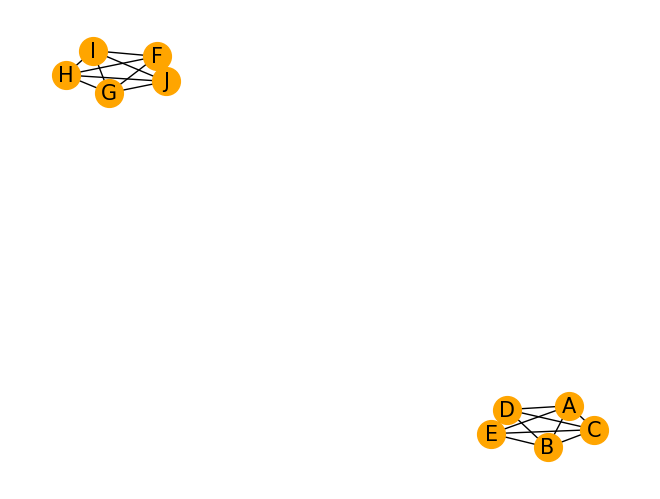

In [ ]:
import networkx as nx

# I build a data set: 10 individuals and 5 variables for each
ind1=[5,10,3,4,8,10,12,1,9,4]
ind5=[1,1,13,4,18,5,2,11,3,8]
df = pd.DataFrame({ 'A':ind1,
                   'B':ind1 + np.random.randint(10, size=(10)) ,
                   'C':ind1 + np.random.randint(10, size=(10)) ,
                    'D':ind1 + np.random.randint(5, size=(10)) ,
                    'E':ind1 + np.random.randint(5, size=(10)),
                    'F':ind5,
                    'G':ind5 + np.random.randint(5, size=(10)) ,
                    'H':ind5 + np.random.randint(5, size=(10)),
                    'I':ind5 + np.random.randint(5, size=(10)),
                    'J':ind5 + np.random.randint(5, size=(10))})

df.shape
df.head(8)

# Calculate the correlation between individuals
corr = df.corr()
sns.heatmap(corr)

 # Transform it in a links data frame (3 columns only):
links = corr.stack().reset_index()
links.columns = ['var1', 'var2', 'value']

# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] > 0.2) & (links['var1'] != links['var2']) ]

# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')

# Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)

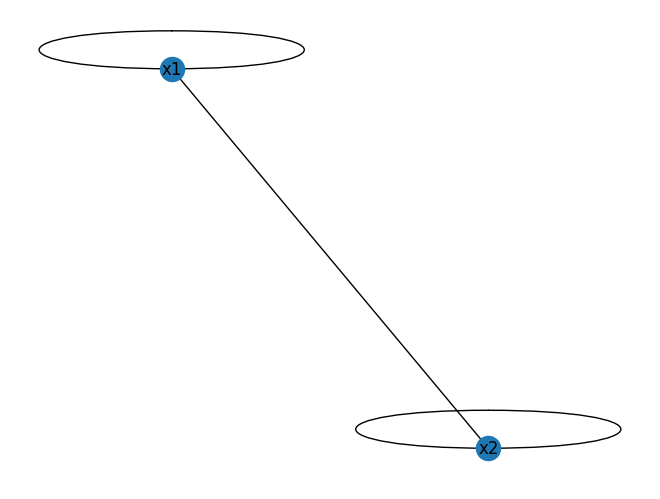

In [ ]:
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]

samples = np.random.multivariate_normal(mean, cov, 20)
samples = pd.DataFrame(samples, columns=['x1', 'x2'])

corr=np.corrcoef(samples.x1,samples.x2) #!!!!
corr=samples.corr()
print(corr)
heatmap=sns.heatmap(corr)

links = corr.stack().reset_index()
links.columns = ['var1', 'var2', 'value']
links


G=nx.from_pandas_edgelist(links, 'var1', 'var2')
nx.draw(G, with_labels=True)



In [ ]:


corr_matrix = np.array([
    [1, 0.85, -0.9, -0.9, -0.9],
    [0.85, 1, -0.9, -0.9, -0.9],
    [-0.9, -0.9, 1, 0.9, 0.9],
    [-0.9, -0.9, 0.9, 1, 0.87],
    [-0.9, -0.9, 0.9, 0.87, 1]
])

# Generate random data from a 5-variate normal distribution with the specified correlations
mean = np.zeros(5)
sample= np.random.multivariate_normal(mean, corr_matrix, size=200)



sample.shape
sample = pd.DataFrame(sample, columns=['x1', 'x2','x3', 'x4','x5'])
sample.columns


corr=sample.corr()
print(corr)
heatmap=sns.heatmap(corr)

links = corr.stack().reset_index()
links.columns = ['var1', 'var2', 'value']
links
links.shape

G=nx.from_pandas_edgelist(links, 'var1', 'var2')
nx.draw(G, with_labels=True)

links_filtered=links.loc[ (links['var1'] != links['var2']) &  (links['value']>0.7) ]
links_filtered.shape
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
nx.draw(G, with_labels=True)


corr_matrix = np.array([
    [1, 0.85, 0.09, -0.09, -0.09],
    [0.85, 1, -0.09, -0.09, -0.09],
    [0.09, -0.09, 1, 0.9, 0.9],
    [-0.09, -0.09, 0.9, 1, 0.87],
    [-0.09, -0.09, 0.9, 0.87, 1]
])

#do the above codes agian


,var1,var2,value
0,x1,x1,1.000000
1,x1,x2,0.849067
2,x1,x3,-0.895496
3,x1,x4,-0.891679
4,x1,x5,-0.900588
5,x2,x1,0.849067
6,x2,x2,1.000000
7,x2,x3,-0.908201
8,x2,x4,-0.869891
9,x2,x5,-0.899375


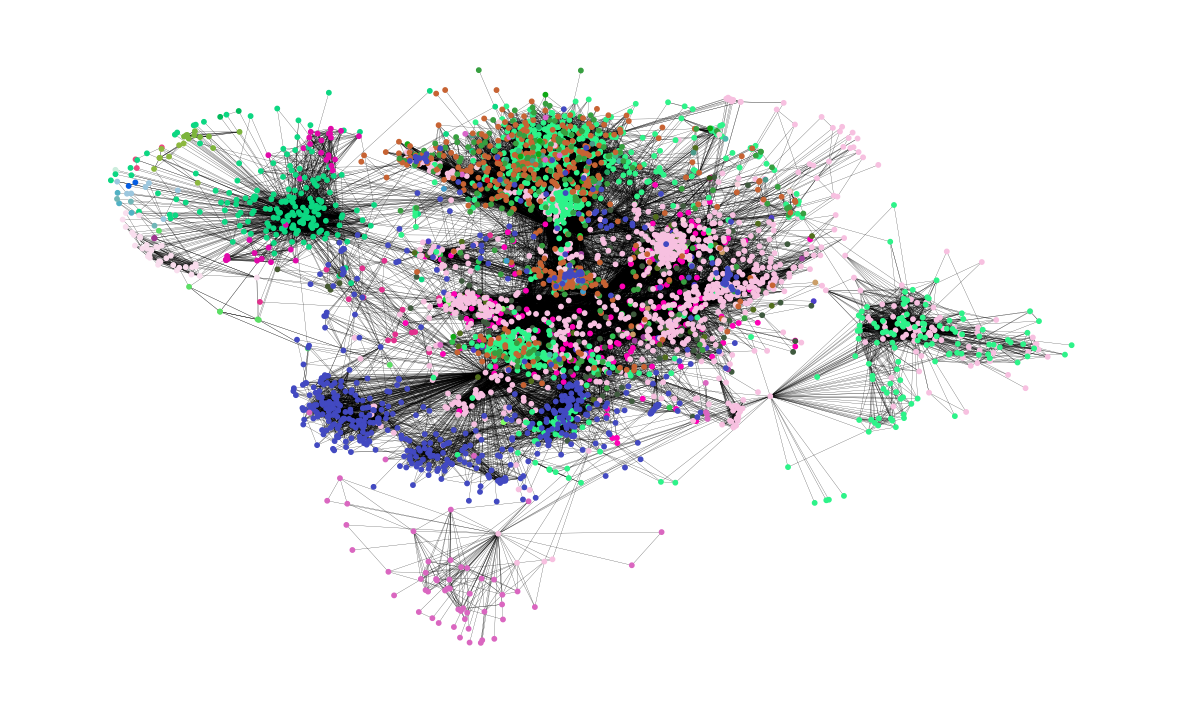

In [ ]:
#Get Stanford Facebook data from the following link
#http://snap.stanford.edu/data/ego-Facebook.html

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline


facebook = pd.read_csv(
    "facebook_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)
facebook


G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)


colors = ["" for x in range(G.number_of_nodes())]  # initialize colors list
counter = 0
for com in nx.community.label_propagation_communities(G):
    color = "#%06X" % randint(0, 0xFFFFFF)  # creates random RGB color
    counter += 1
    for node in list(
        com
    ):  # fill colors list with the particular color for the community nodes
        colors[node] = color
counter

plt.figure(figsize=(15, 9))
plt.axis("off")
nx.draw_networkx(
    G, pos=pos, node_size=10, with_labels=False, width=0.15, node_color=colors
)




Number of nodes: 4039
Number of edges: 88234


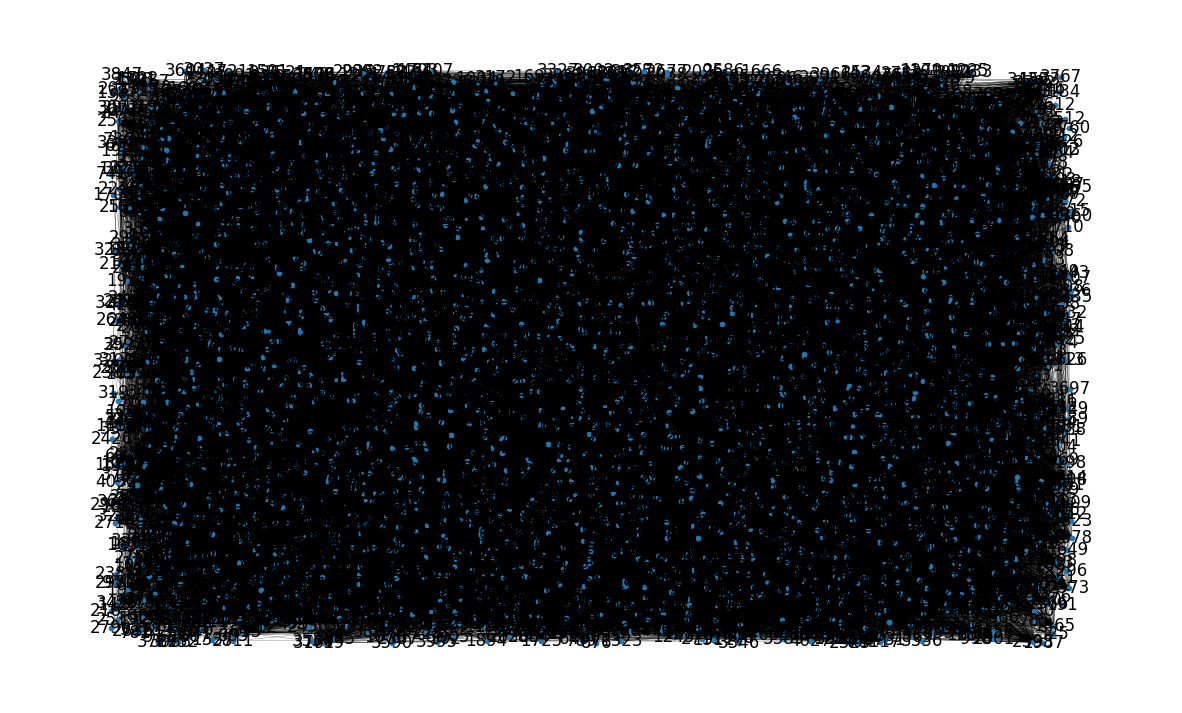

In [ ]:


facebook = pd.read_csv(
    "facebook_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)
facebook.shape


G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": True, "width": 0.15}
nx.draw_networkx(G,  pos=nx.random_layout(G), ax=ax, **plot_options)

Number of nodes: 151
Number of edges: 200


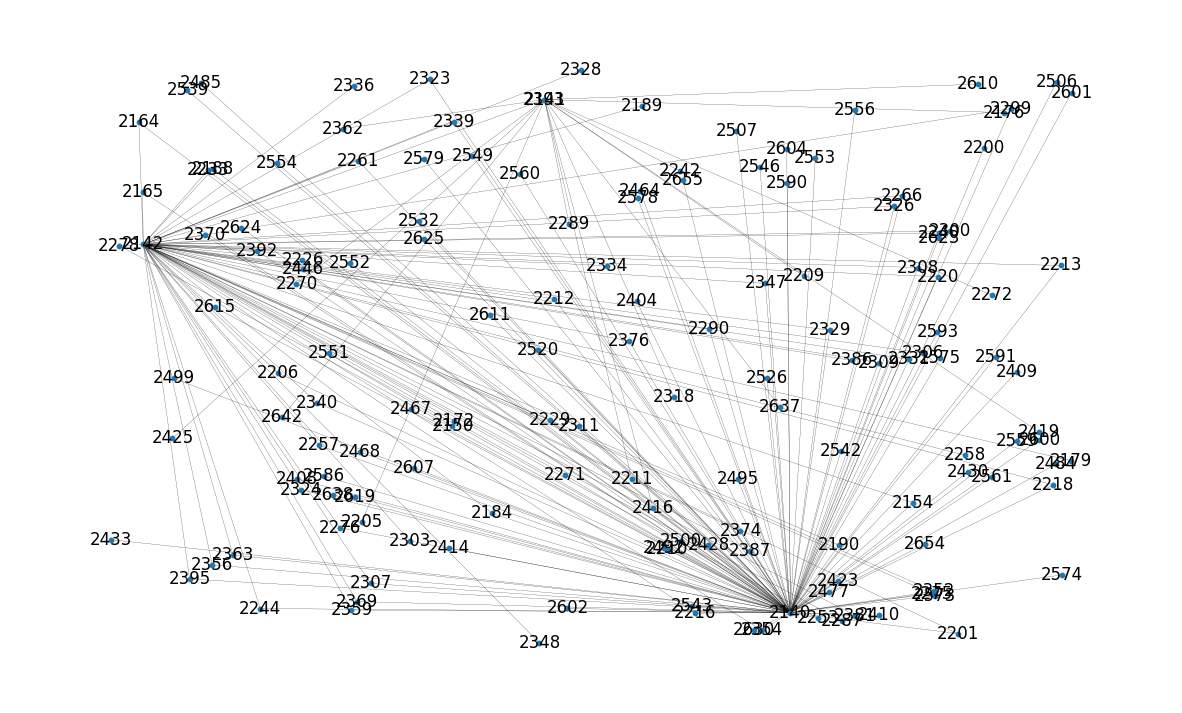

In [ ]:
facebook = pd.read_csv(
    "facebook_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)
facebook.shape
facebook=facebook[55000:55200]


G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": True, "width": 0.15}
nx.draw_networkx(G,  pos=nx.random_layout(G), ax=ax, **plot_options)

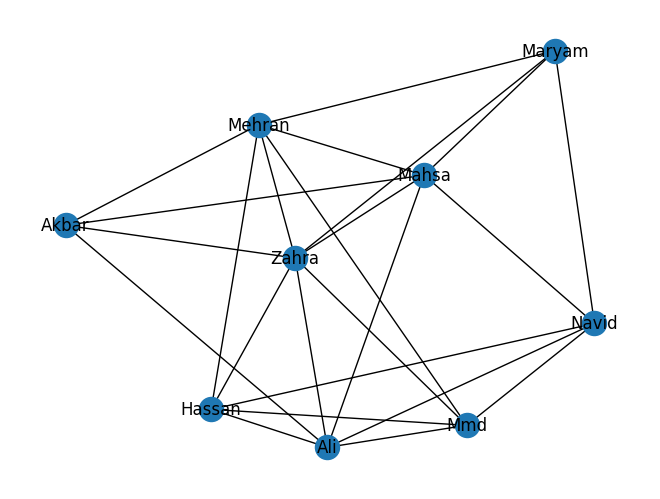

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt

names = ['Ali', 'Hassan', 'Maryam', 'Mahsa', 'Mehran', 'Navid', 'Mmd', 'Akbar', 'Zahra']
len(names)
# Create a dataframe with two columns, each containing 20 US names
Iranian_facebook = pd.DataFrame({
    'start_node': np.random.choice(names, size=50, replace=True),
    'end_node': np.random.choice(names, size=50, replace=True)
})

print(Iranian_facebook)
Iranian_facebook.shape
G = nx.from_pandas_edgelist(Iranian_facebook, "start_node", "end_node")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 30, "with_labels": True, "width": 0.7}
nx.draw_networkx(G,  pos=nx.random_layout(G), ax=ax, **plot_options)

links_filtered.shape





# NOW use filter in case to remove identical start_node and start_node cases
#  to remove the self followings




In [ ]:
Iranian_facebook_filtered=Iranian_facebook.loc[ (Iranian_facebook['start_node'] != Iranian_facebook['end_node']) ]
Iranian_facebook_filtered.shape

G = nx.from_pandas_edgelist(Iranian_facebook_filtered, "start_node", "end_node")
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 20, "with_labels": True, "width": 0.5}
nx.draw_networkx(G,  pos=nx.random_layout(G), ax=ax, **plot_options)
